In [6]:
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)
city_data_df = city_data_df.drop_duplicates('city', keep = 'first')

#Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')
#Display the data table for preview
reordered_data_df = combined_data_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
reordered_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

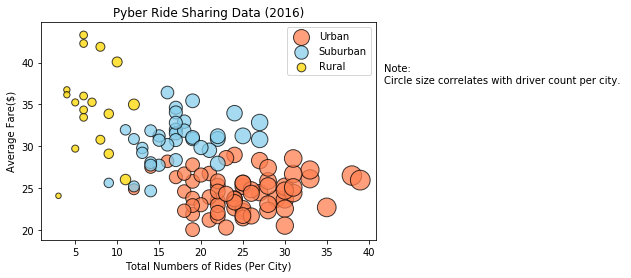

In [7]:
#Seperate dataframes by city type
urban = reordered_data_df.loc[(reordered_data_df["type"] == "Urban")]
suburb = reordered_data_df.loc[(reordered_data_df["type"] == "Suburban")]
rural = reordered_data_df.loc[(reordered_data_df["type"] == "Rural")]

#Calculations by city type
avg_fare_urban = urban.groupby(['city'])['fare'].mean()
total_rides_urban = urban.groupby(['city']).count()['ride_id']
total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburb = suburb.groupby(['city'])['fare'].mean()
total_rides_suburb = suburb.groupby(['city']).count()['ride_id']
total_drivers_suburb = suburb.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural = rural.groupby(['city'])['fare'].mean()
total_rides_rural = rural.groupby(['city']).count()['ride_id']
total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

#Create scatter plots
plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10,
            marker ='o', facecolors ="coral", edgecolors='black', alpha = 0.75, label="Urban")
plt.scatter(total_rides_suburb, avg_fare_suburb, s=total_drivers_suburb*10,
            marker ='o', facecolors ="skyblue", edgecolors='black', alpha = 0.75, label="Suburban")
plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black', alpha = 0.75, label="Rural")

#Other properties and create legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')

#Incorporate a text label regarding circle size
plt.figtext(0.92, 0.7, "Note:\n Circle size correlates with driver count per city.", wrap=True, verticalalignment='center',
           fontsize=10)

#Save and print to screen
plt.savefig("Images/Pyber.png")
plt.show()

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

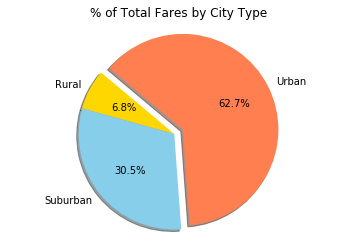

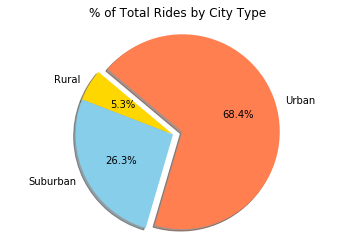

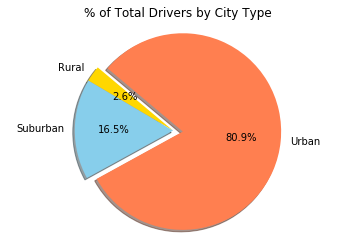

In [8]:
#Calculate Total Fare by City Type
total_fare = reordered_data_df.groupby(['type'])['fare'].sum()
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","coral"]
plt.title("% of Total Fares by City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/Total Fares.png")
plt.show()

#Calculate Total Fare by City Type
total_rides = reordered_data_df.groupby(['type'])['ride_id'].count()
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","coral"]
plt.title("% of Total Rides by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/Total Rides.png")
plt.show()

#Calculate Total Drivers by City Type
total_drivers = city_data_df.groupby(['type'])['driver_count'].sum()
explode = (0, 0, 0.1)
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","skyblue","coral"]
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/Total Drivers.png")
plt.show()

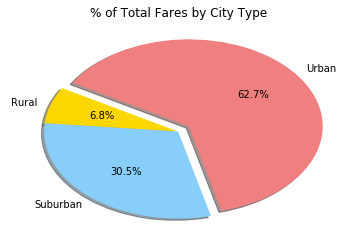

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


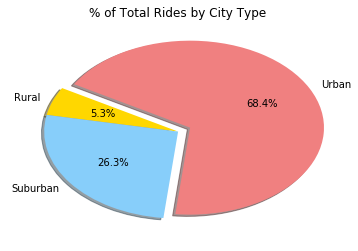

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


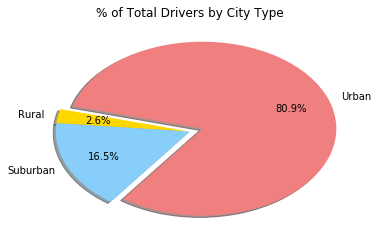

In [6]:
# Show Figure
plt.show()